# DS2000 (Spring 2019, NCH) :: Lecture 9b

In [1]:
%%html
<style>
#ipython_notebook img {                                                                                       
    display:block;
    background: url(https://course.ccs.neu.edu/ds2000sp19nch/img/logo.png) no-repeat;
    background-size: contain;
    width: 100px;
    height: 30px;
    padding-left: 100px;
    -moz-box-sizing: border-box;
    box-sizing: border-box;
}
</style>

## 0. Administrivia

1. Due today @ 9pm: HW8 (submit via Blackboard)
2. Due before Monday's lecture: pre-class quiz (via Blackboard; feel free to use book/notes/Python)
  - One more after this!
3. Due next Friday @ 9pm: HW9 (submit via Blackboard)
  - Last one!!! :')

## Dataset: Political Speeches
* Obama speeches: https://github.com/samim23/obama-rnn
* Trump: https://github.com/ryanmcdermott/trump-speeches

In [2]:
# If you haven't used nltk before, run the following
# import nltk
# nltk.download('stopwords')

import os
import string
from nltk.corpus import stopwords

def get_speech_path(politician):
    return os.path.join("political-speech-files", "{}-speeches.txt".format(politician))

def preprocess(word):
    bad_letters = string.punctuation + string.digits
    word = list(word.lower())
    return "".join([letter for letter in word if (letter=="'" or letter not in bad_letters)])

def get_all_words(politician):
    with open(get_speech_path(politician), 'r', encoding='utf8') as f:
        all_words = f.read().split()
    preprocessed = [preprocess(word) for word in all_words]
    
    # common words we don't care about
    stop_words = stopwords.words('english') + ['—', '–']
    
    return [word for word in preprocessed if word and word not in stop_words]

obama_words = get_all_words('obama')
trump_words = get_all_words('trump')

## Sentiment Analysis Class

* Source: http://ai.stanford.edu/~amaas/data/sentiment/ 

In [3]:
class SentimentAnalyzer:
    
    def __init__(self, vocab_fpath, weights_fpath):
        with open(vocab_fpath, 'r', encoding='utf8') as vocab, open(weights_fpath, 'r', encoding='utf8') as weights:
            self.vocab_dict = {word:float(weight) for word, weight in zip(vocab.read().split(), weights.read().split())}

    def score_word(self, word):
        return self.vocab_dict.get(word, 0)
    
    def score_collection(self, phrase):
        if not phrase:
            return 0
        else:
            return sum([self.score_word(word) for word in phrase]) / len(phrase)

In [4]:
import os

imdb_sentiment = SentimentAnalyzer(os.path.join('aclImdb', 'imdb.vocab'), os.path.join('aclImdb', 'imdbEr.txt'))

In [5]:
print(imdb_sentiment.score_word('terrible'))

-2.18077869986


In [6]:
print(imdb_sentiment.score_word('hilarious'))

0.993189582589


In [7]:
review = '''
A surprisingly beautiful movie. 
Beautifully conceived, beautifully directed, beautifully acted, beautifully acted and most beautifully photographed.....the cinematography is nothing short of splendid. 
It is a war movie but is epic in it's scope and blends romance, tragedy and comedy into a story that is as harrowing as it is provoking.
'''

print(imdb_sentiment.score_collection(review.split()))

0.36281647436158926


## Putting it All Together & Visualize!

In [8]:
obama_sentiment = imdb_sentiment.score_collection(obama_words)

In [9]:
trump_sentiment = imdb_sentiment.score_collection(trump_words)

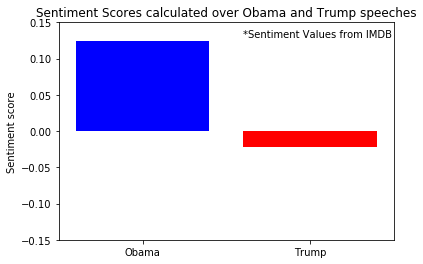

In [19]:
import matplotlib.pyplot as plt

plt.bar([0, 1], [obama_sentiment, trump_sentiment], color=["Blue", "Red"], tick_label=['Obama', 'Trump'], align='center')
plt.ylabel("Sentiment score")
plt.title("Sentiment Scores calculated over Obama and Trump speeches")
plt.text(0.6, 0.13, '*Sentiment Values from IMDB')

plt.axis([-0.5, 1.5, -0.15, 0.15])

plt.show()